In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab/Lab_3/House_Rent_Dataset.csv', sep=',')
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [33]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std
X_norm, mu, sigma = feature_normalize(df2[['BHK','Rent','Size','Bathroom']])
df2['BHK'] = X_norm[:,0]
df2['Rent'] = X_norm[:,1]
df2['Size'] = X_norm[:,2]
df2['Bathroom'] = X_norm[:,3]
df2[['BHK','Rent','Size','Bathroom']].describe().T # display the normalized data

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,-5.988561e-18,1.0,-1.302316,-0.100762,-0.100762,1.100791,4.705452
Rent,4746.0,0.000000e+00,1.0,-0.432659,-0.319992,-0.243174,-0.025522,44.362638
Size,4746.0,1.257598e-16,1.0,-1.509756,-0.658293,-0.185257,0.366617,11.088747
Bathroom,4746.0,-5.988561e-17,1.0,-1.091952,-1.091952,0.038590,0.038590,9.082924


In [35]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

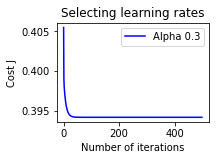

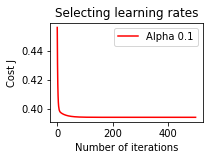

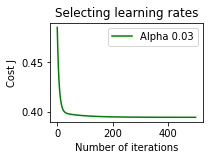

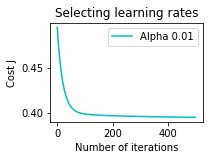

Theta found by gradient descent:
[[-0.01617584]
 [ 0.1968833 ]
 [ 0.30816919]]


In [36]:
m = df2.shape[0]
# X = np.hstack((np.ones((m,1)),X_norm[:,:2]))
X = np.delete(X_norm, 1, axis = 1)
y = np.array(X_norm[:,1]).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 500 # can change the iteration
# Plotting the cost function
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.subplot(2,2,i+1)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
    plt.xlabel('Number of iterations');
    plt.ylabel('Cost J');
    plt.title('Selecting learning rates');
    plt.legend()
    plt.show()
iterations = 250
alpha = 0.1
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

In [37]:
sqft = (1650 - mu[2])/sigma[2]
bedrooms = (3 - mu[0])/sigma[0]
y_pred = theta[0] + theta[1]*sqft + theta[2]*bedrooms
y_pred = (y_pred*sigma[1])+mu[1]
print('Price of a house with 1650 square feet and 3 bedrooms:', y_pred[0])

Price of a house with 1650 square feet and 3 bedrooms: 76775.21864798339
